# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [ ]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd
from sklearn import metrics

scikit-learn version:  0.22.2.post1


In [ ]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [ ]:
ID = 2014329
np.random.seed(ID)

In [ ]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [ ]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [59 53 61 66 65 64 52 62 60 58]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [59 53 61 66 65 64 52 62 60 58]


In [ ]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


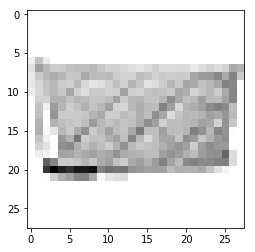

LABEL: 8
INPUT:


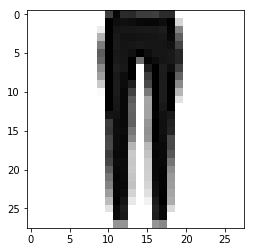

LABEL: 1
INPUT:


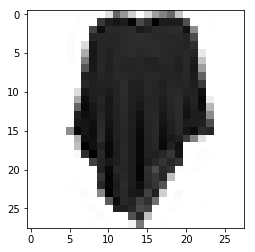

LABEL: 4


In [ ]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [ ]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (30,), (20,20,), (30,30,20)]}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

model = GridSearchCV(estimator = mlp,param_grid = parameters, scoring= 'accuracy', cv = 5, verbose = 1,
                        return_train_score=True) 
model.fit(X_train, y_train)
results = pd.DataFrame(model.cv_results_)
best_score = model.best_score_
best_params = model.best_params_

print ('RESULTS FOR NN\n')

print("Best parameters set found:",best_params)
#ADD YOUR CODE

print("Score with best parameters:",best_score)
#ADD YOUR CODE

print("\nAll scores on the grid:",results)
#ADD YOUR CODE

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   20.5s finished
C:\Users\f\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (20,)}
Score with best parameters: 0.775

All scores on the grid:    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.122355      0.351665         0.000999        0.000632   
1       1.143742      0.129728         0.001199        0.000399   
2       0.871702      0.401707         0.000999        0.000001   
3       0.493119      0.097697         0.000999        0.000632   
4       0.460137      0.082931         0.001203        0.000398   

  param_hidden_layer_sizes                                params  \
0                    (10,)         {'hidden_layer_sizes': (10,)}   
1                    (20,)         {'hidden_layer_sizes': (20,)}   
2                    (30,)         {'hidden_layer_sizes': (30,)}   
3                 (20, 20)      {'hidden_layer_sizes': (20, 20)}   
4             (30, 30, 20)  {'hidden_layer_sizes': (30, 30, 20)}   

   split0_test_score  split1_test_score  split2_test_sco

### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [ ]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters2 = {'hidden_layer_sizes': [(20,)],'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp2 = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
# recall to use cv=kf to use the k-fold subdivision seen in the lectures
model2 = GridSearchCV(estimator = mlp2,param_grid = parameters2, scoring= 'accuracy', cv = kf, verbose = 1,
                        return_train_score=True) 
model2.fit(X_train, y_train)
results2 = pd.DataFrame(model2.cv_results_)
best_score2 = model2.best_score_
best_params2 = model2.best_params_




print ('RESULTS FOR NN\n')

print("Best parameters set found:",best_params2)
#ADD YOUR CODE

print("Score with best parameters:",best_score2)
#ADD YOUR CODE

print("\nAll scores on the grid:",results2)
#ADD YOUR CODE

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\f\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\f\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   43.3s finished


RESULTS FOR NN

Best parameters set found: {'batch_size': 480, 'hidden_layer_sizes': (20,)}
Score with best parameters: 0.7833333333333333

All scores on the grid:    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.987028      2.480954         0.001601        0.000801   
1       0.930069      0.424967         0.000999        0.000001   
2       1.740196      0.494373         0.001199        0.000400   

  param_batch_size param_hidden_layer_sizes  \
0                1                    (20,)   
1               32                    (20,)   
2              480                    (20,)   

                                             params  split0_test_score  \
0    {'batch_size': 1, 'hidden_layer_sizes': (20,)}           0.100000   
1   {'batch_size': 32, 'hidden_layer_sizes': (20,)}           0.658333   
2  {'batch_size': 480, 'hidden_layer_sizes': (20,)}           0.783333   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]
With bigger batch size, we have better results and accuracy.
We can not get good result with lots of hidden layers and here 20 is the best one.
With bigger batch size convergence gets difficult.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 8.39 sec

Training MLP of size (20,) ...
Done, training time: 10.11 sec

Training MLP of size (30,) ...
Done, training time: 10.33 sec

Training MLP of size (30, 20) ...
Done, training time: 8.04 sec

Training MLP of size (30, 30, 20) ...
Done, training time: 5.96 sec



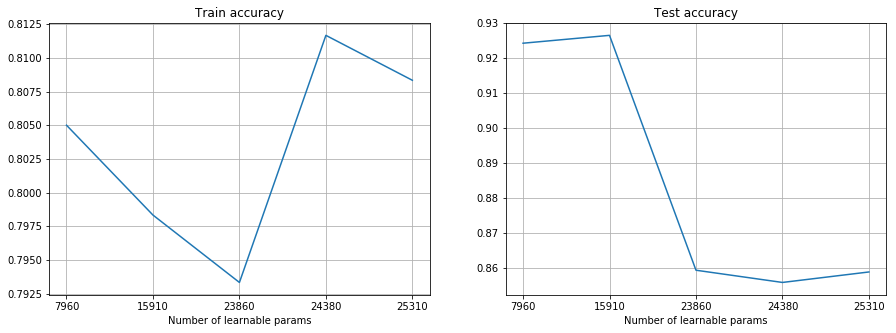

In [ ]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (30,20,), (30,30,20)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(hidden_layer_sizes=hl_size,max_iter=300, alpha=1e-4, solver='sgd',batch_size=480,
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
    
    mlp.fit(X_train, y_train)
    mlp.fit(X_test,y_test)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]
With more hidden layers we will have overfitting and with less than 20 we have underfitting.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

C:\Users\f\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Minimum Loss for Learning Rate 0.001 is: 0.5831848569479434


C:\Users\f\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Minimum Loss for Learning Rate 0.01 is: 0.03772288330234733
Minimum Loss for Learning Rate 0.1 is: 0.07883283677854484
RESULTS FOR NN

Best parameters set found: <bound method BaseEstimator.get_params of MLPClassifier(activation='relu', alpha=0.0001, batch_size=480, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2014329, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)>
Minimum Loss with best parameters: 0.03772288330234733
Score with best parameters: 1.0


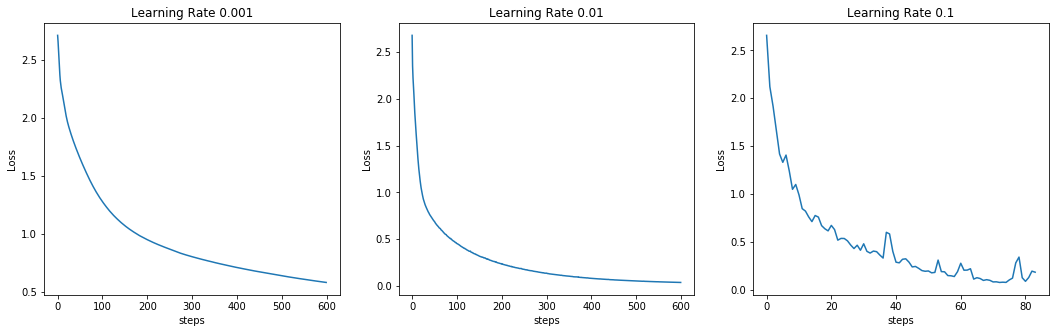

In [ ]:
import matplotlib.pyplot as plt
import operator

#lr_list = [0.001, 0.01, 0.1]
lr_list = [10**exp for exp in range(-3,0)]
scores = {}
mlp4_1 = MLPClassifier(hidden_layer_sizes=20, solver='sgd',tol=1e-4,batch_size=480, learning_rate_init=lr_list[0],
                       max_iter=600, shuffle=True, random_state=ID)
mlp4_1.fit(X_train, y_train)
fig, ax = plt.subplots(1,3, figsize=(18,5))
ax[0].plot(mlp4_1.loss_curve_)
ax[0].set_title("Learning Rate 0.001")
ax[0].set_xlabel('steps')
ax[0].set_ylabel('Loss')
best_loss4_1 = mlp4_1.best_loss_
print('Minimum Loss for Learning Rate 0.001 is:',best_loss4_1)

mlp4_2 = MLPClassifier(hidden_layer_sizes=20, solver='sgd',tol=1e-4,batch_size=480, learning_rate_init=lr_list[1],
                       max_iter=600, shuffle=True, random_state=ID)
mlp4_2.fit(X_train, y_train)
ax[1].plot(mlp4_2.loss_curve_)
ax[1].set_title("Learning Rate 0.01")
ax[1].set_xlabel('steps')
ax[1].set_ylabel('Loss')
best_loss4_2 = mlp4_2.best_loss_
print('Minimum Loss for Learning Rate 0.01 is:',best_loss4_2)

mlp4_3 = MLPClassifier(hidden_layer_sizes=20, solver='sgd',tol=1e-4,batch_size=480, learning_rate_init=lr_list[2],
                       max_iter=600, shuffle=True, random_state=ID)
mlp4_3.fit(X_train, y_train)
ax[2].plot(mlp4_3.loss_curve_)
ax[2].set_title("Learning Rate 0.1")
ax[2].set_xlabel('steps')
ax[2].set_ylabel('Loss')
best_loss4_3 = mlp4_3.best_loss_
print('Minimum Loss for Learning Rate 0.1 is:',best_loss4_3)

best_score_all = min(best_loss4_1,best_loss4_2,best_loss4_3)
print ('RESULTS FOR NN\n')

print("Best parameters set found:",mlp4_2.get_params)
#ADD YOUR CODE

print("Minimum Loss with best parameters:",best_score_all)
best_accuracy = mlp4_2.score(X_train,y_train)
print("Score with best parameters:",best_accuracy)


### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]
With bigger learning rate we can not reach the best accuracy and it will lose the best accuracy. 
With learning rate = 0.01 we can achieve the best accuracy.
with very small learning rate we can not find the minimum loss.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.

C:\Users\f\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



RESULTS FOR BEST NN

Best NN training error: 0.037723
Best NN test error: 0.079539


C:\Users\f\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'Loss')

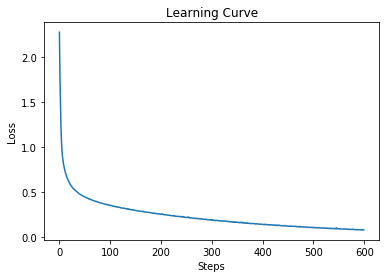

In [ ]:
#get training and test error for the best NN model from CV

mlp5 = MLPClassifier(hidden_layer_sizes=20, solver='sgd',tol=1e-4,batch_size=480, learning_rate_init=0.01,
                       max_iter=600, shuffle=True, random_state=ID)
train = mlp5.fit(X_train, y_train)
training_error = train.best_loss_
test = mlp5.fit(X_test, y_test)
test_error = test.best_loss_
print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

#ADD YOUR CODE FOR PLOTTING
plt.plot(mlp5.loss_curve_)
plt.title("Learning Curve")
plt.xlabel("Steps")
plt.ylabel("Loss")

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [ ]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train6, X_test6 = X[:m_training], X[m_training:]
y_train6, y_test6 = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [59 53 61 66 65 64 52 62 60 58]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [ ]:
# use best architecture and params from before

mlp6 = MLPClassifier(hidden_layer_sizes=20, solver='sgd',tol=1e-4,batch_size=480, 
                     learning_rate_init=0.01,max_iter=600, shuffle=True, random_state=ID,verbose=True)

#get training and test error for the NN
train6 = mlp6.fit(X_train6, y_train6)
training_error = train6.best_loss_
test6 = mlp6.fit(X_test6, y_test6)
test_error = test6.best_loss_
#ADD YOUR CODE
print ('\nRESULTS FOR NN\n')
print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


Iteration 1, loss = 2.27393440
Iteration 2, loss = 1.79876142
Iteration 3, loss = 1.49406816
Iteration 4, loss = 1.25019037
Iteration 5, loss = 1.08061077
Iteration 6, loss = 0.97266189
Iteration 7, loss = 0.90301129
Iteration 8, loss = 0.85636152
Iteration 9, loss = 0.82205274
Iteration 10, loss = 0.79225820
Iteration 11, loss = 0.76682645
Iteration 12, loss = 0.74500522
Iteration 13, loss = 0.72394746
Iteration 14, loss = 0.70758082
Iteration 15, loss = 0.69205468
Iteration 16, loss = 0.67654837
Iteration 17, loss = 0.66127655
Iteration 18, loss = 0.65083559
Iteration 19, loss = 0.63694559
Iteration 20, loss = 0.62645527
Iteration 21, loss = 0.61934099
Iteration 22, loss = 0.60688054
Iteration 23, loss = 0.59958608
Iteration 24, loss = 0.59084650
Iteration 25, loss = 0.58203108
Iteration 26, loss = 0.57401642
Iteration 27, loss = 0.56988760
Iteration 28, loss = 0.55919647
Iteration 29, loss = 0.55467519
Iteration 30, loss = 0.54805246
Iteration 31, loss = 0.54102741
Iteration 32, los

Iteration 255, loss = 0.21739028
Iteration 256, loss = 0.21630946
Iteration 257, loss = 0.21541954
Iteration 258, loss = 0.21472893
Iteration 259, loss = 0.21194153
Iteration 260, loss = 0.21506459
Iteration 261, loss = 0.21047177
Iteration 262, loss = 0.21070533
Iteration 263, loss = 0.21114766
Iteration 264, loss = 0.21041349
Iteration 265, loss = 0.21096858
Iteration 266, loss = 0.20813921
Iteration 267, loss = 0.20852501
Iteration 268, loss = 0.21050256
Iteration 269, loss = 0.20520563
Iteration 270, loss = 0.20523891
Iteration 271, loss = 0.20568627
Iteration 272, loss = 0.20431863
Iteration 273, loss = 0.20230000
Iteration 274, loss = 0.20550535
Iteration 275, loss = 0.20799906
Iteration 276, loss = 0.20140133
Iteration 277, loss = 0.20368423
Iteration 278, loss = 0.20208639
Iteration 279, loss = 0.19993944
Iteration 280, loss = 0.20035186
Iteration 281, loss = 0.19728702
Iteration 282, loss = 0.19871268
Iteration 283, loss = 0.19953744
Iteration 284, loss = 0.19820524
Iteration 

Iteration 505, loss = 0.10548727
Iteration 506, loss = 0.10091309
Iteration 507, loss = 0.09950066
Iteration 508, loss = 0.09989967
Iteration 509, loss = 0.09957878
Iteration 510, loss = 0.09841763
Iteration 511, loss = 0.10794626
Iteration 512, loss = 0.10096225
Iteration 513, loss = 0.09821335
Iteration 514, loss = 0.09816389
Iteration 515, loss = 0.09808612
Iteration 516, loss = 0.09765291
Iteration 517, loss = 0.09732111
Iteration 518, loss = 0.10047684
Iteration 519, loss = 0.09996153
Iteration 520, loss = 0.09876130
Iteration 521, loss = 0.09854261
Iteration 522, loss = 0.09752688
Iteration 523, loss = 0.09661268
Iteration 524, loss = 0.09514579
Iteration 525, loss = 0.09539635
Iteration 526, loss = 0.09595913
Iteration 527, loss = 0.09533346
Iteration 528, loss = 0.09424821
Iteration 529, loss = 0.09743637
Iteration 530, loss = 0.09408035
Iteration 531, loss = 0.09404747
Iteration 532, loss = 0.09346512
Iteration 533, loss = 0.09310599
Iteration 534, loss = 0.09496810
Iteration 

C:\Users\f\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.11070111
Iteration 2, loss = 0.64159199
Iteration 3, loss = 0.55209037
Iteration 4, loss = 0.51084506
Iteration 5, loss = 0.48715944
Iteration 6, loss = 0.47006649
Iteration 7, loss = 0.45731805
Iteration 8, loss = 0.44773515
Iteration 9, loss = 0.44019770
Iteration 10, loss = 0.43241311
Iteration 11, loss = 0.42635996
Iteration 12, loss = 0.42022239
Iteration 13, loss = 0.41497726
Iteration 14, loss = 0.41173873
Iteration 15, loss = 0.40654554
Iteration 16, loss = 0.40270966
Iteration 17, loss = 0.39853029
Iteration 18, loss = 0.39394160
Iteration 19, loss = 0.39060341
Iteration 20, loss = 0.38714552
Iteration 21, loss = 0.38432467
Iteration 22, loss = 0.38170887
Iteration 23, loss = 0.37870923
Iteration 24, loss = 0.37561510
Iteration 25, loss = 0.37361922
Iteration 26, loss = 0.37111239
Iteration 27, loss = 0.36875410
Iteration 28, loss = 0.36658071
Iteration 29, loss = 0.36414245
Iteration 30, loss = 0.36309387
Iteration 31, loss = 0.36027163
Iteration 32, los

Iteration 253, loss = 0.24613734
Iteration 254, loss = 0.24509635
Iteration 255, loss = 0.24485933
Iteration 256, loss = 0.24468497
Iteration 257, loss = 0.24557208
Iteration 258, loss = 0.24490429
Iteration 259, loss = 0.24434172
Iteration 260, loss = 0.24370819
Iteration 261, loss = 0.24441754
Iteration 262, loss = 0.24370304
Iteration 263, loss = 0.24351187
Iteration 264, loss = 0.24311688
Iteration 265, loss = 0.24341890
Iteration 266, loss = 0.24273811
Iteration 267, loss = 0.24282110
Iteration 268, loss = 0.24304625
Iteration 269, loss = 0.24265139
Iteration 270, loss = 0.24282349
Iteration 271, loss = 0.24208212
Iteration 272, loss = 0.24156388
Iteration 273, loss = 0.24148848
Iteration 274, loss = 0.24277642
Iteration 275, loss = 0.24127500
Iteration 276, loss = 0.24151178
Iteration 277, loss = 0.24177740
Iteration 278, loss = 0.24146717
Iteration 279, loss = 0.24039903
Iteration 280, loss = 0.24065708
Iteration 281, loss = 0.24023824
Iteration 282, loss = 0.24151073
Iteration 

Iteration 502, loss = 0.20875354
Iteration 503, loss = 0.20899259
Iteration 504, loss = 0.20798780
Iteration 505, loss = 0.20757146
Iteration 506, loss = 0.20833906
Iteration 507, loss = 0.20859684
Iteration 508, loss = 0.20829263
Iteration 509, loss = 0.20770695
Iteration 510, loss = 0.20891449
Iteration 511, loss = 0.20842693
Iteration 512, loss = 0.20773986
Iteration 513, loss = 0.20714298
Iteration 514, loss = 0.20719870
Iteration 515, loss = 0.20734812
Iteration 516, loss = 0.20772714
Iteration 517, loss = 0.20641735
Iteration 518, loss = 0.20734416
Iteration 519, loss = 0.20623662
Iteration 520, loss = 0.20594192
Iteration 521, loss = 0.20599584
Iteration 522, loss = 0.20640014
Iteration 523, loss = 0.20757726
Iteration 524, loss = 0.20554766
Iteration 525, loss = 0.20652376
Iteration 526, loss = 0.20612979
Iteration 527, loss = 0.20608285
Iteration 528, loss = 0.20574032
Iteration 529, loss = 0.20530309
Iteration 530, loss = 0.20531855
Iteration 531, loss = 0.20528716
Iteration 

C:\Users\f\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]
It will take too much time to be converged with a large number of samples. But we can get better results if we have powerfull computer for running.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

[86, 369, 513, 600, 1282, 1315, 1355, 1420, 1810, 2082, 2226, 2357, 2635, 3520]


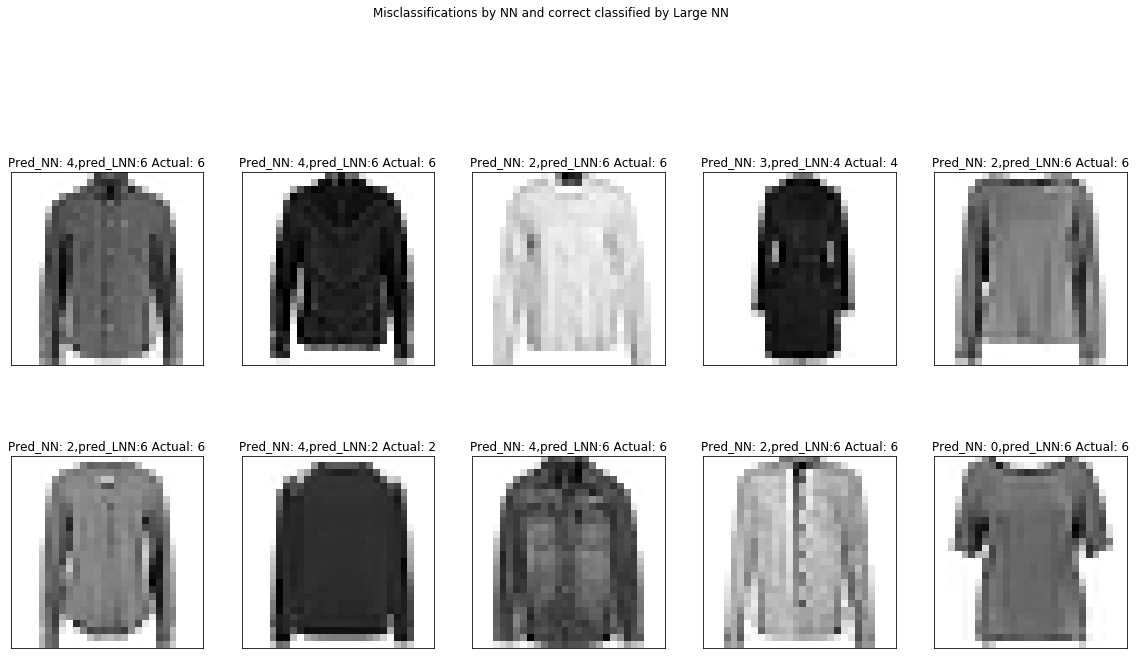

In [ ]:
NN_prediction = mlp5.predict(X_test)
large_NN_prediction = mlp6.predict(X_test)

#ADD YOUR CODE
index = 0
misclassified_images = []
for label, predict_NN,predict_LNN in zip(y_test, NN_prediction,large_NN_prediction):
    if (label != predict_NN)and (label==predict_LNN): 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
plt.figure(figsize=(20,20))
plt.suptitle('Misclassifications by NN and correct classified by Large NN');

for plot_index, bad_index in enumerate(misclassified_images[0:10]):
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot
    p.imshow(
        X_test[bad_index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    p.set_xticks(()); p.set_yticks(()) # remove ticks
    
    p.set_title(f'Pred_NN: {NN_prediction[bad_index]},pred_LNN:{large_NN_prediction[bad_index]} Actual: {y_test[bad_index]}')

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


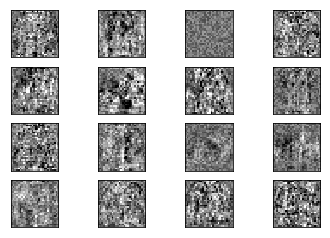

Weights with 4000 data points:


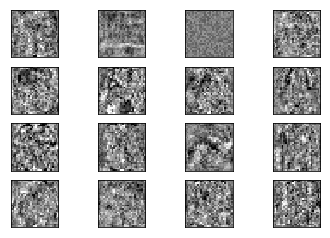

In [ ]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp5.coefs_[0].min(), mlp5.coefs_[0].max()
for coef, ax in zip(mlp5.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp6.coefs_[0].min(), mlp6.coefs_[0].max()
for coef, ax in zip(mlp6.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]
With less data points we can see the weights better.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [ ]:
m_training = 5000

X_train9, X_test9 = X[:m_training], X[m_training:2*m_training]
y_train9, y_test9 = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting
best_model = SVC(C=10, gamma = 1e-02, kernel='rbf')
best_model.fit(X_train9,y_train9)
#ADD YOUR CODE

print ('RESULTS FOR SVM')

SVM_training_error =  1- best_model.score(X_train9,y_train9)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1- best_model.score(X_test9,y_test9)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.011600000000000055
Test score SVM:
0.13580000000000003


In [ ]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C=1)
regL2.fit(X_train9, y_train9)

# you can re-use your code from Lab 2

#ADD YOUR CODE

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error =  1- regL2.score(X_train9,y_train9)
test_error =  1- regL2.score(X_test9,y_test9)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.071000
Test error (reg): 0.169400


C:\Users\f\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]
RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.071000
Test error (reg): 0.169400

RESULTS FOR SVM
Training score SVM: 0.011600000000000055
Test score SVM: 0.13580000000000003

RESULTS FOR NN FOR 4000 DATA POINTS
NN training error: 0.077982
NN test error: 0.198536

So we can see that SVM has the best results.